In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from qutip import *
import tgates1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 2.28661708e-06+0.00000000e+00j
  0.00000000e+00+1.04830256e-06j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00-1.04830256e-06j
  9.99997713e-01+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]]

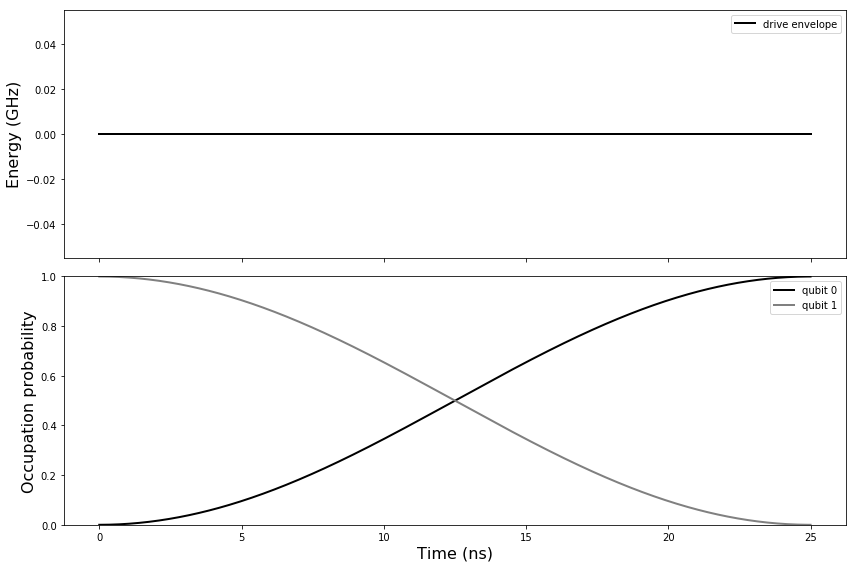

In [4]:
'''

psi0 = tensor(
    basis(2,0),
    basis(2,0),
    basis(2,0),
    (basis(2,0)+basis(2,1))/np.sqrt(2))
'''

qchip = tgates1.QuantumChip(wq = [5.0 * 2 * np.pi, 6.0 * 2 * np.pi],
                            g = [0.1 * 2*np.pi, 0.1 * 2*np.pi],
                            psi0 = [[1,0], [1,0]],
                            gamma = [0, 0], kappa = 0)
qchip.psi0 = tensor(basis(2,0),
                    basis(2,1))
qchip.iSWAP(0,1)
qchip.psi0


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.00000646e+00+0.00000000e+00j  0.00000000e+00-1.07410331e-06j]
 [ 0.00000000e+00+1.07410331e-06j -6.46273931e-06+0.00000000e+00j]]

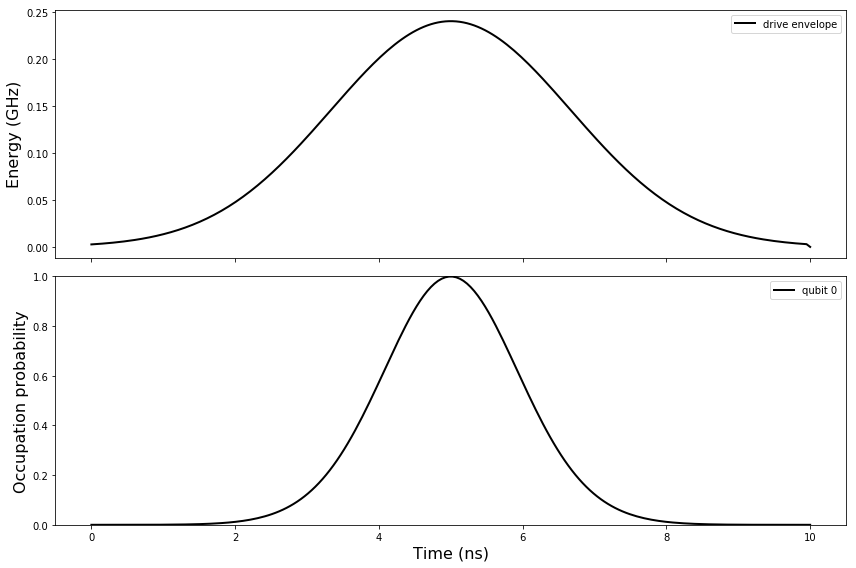

In [6]:
qchip = tgates1.QuantumChip(wq = [5.0 * 2 * np.pi],
                            g = [0.1 * 2*np.pi],
                            psi0 = [[1,0]],
                            gamma = [0], kappa = 0)
qchip.psi0 = tensor(basis(2,0))
qchip.Rx(0, 2*np.pi)
qchip.psi0

In [ ]:
qchip.iSWAP(0,1)
qchip.psi0

In [ ]:
qchip.Y(1)
qchip.psi0

In [ ]:
qchip.sqrtiSWAP(0,1)
qchip.psi0

In [ ]:
qchip.iSWAP(1,3)
qchip.psi0

In [ ]:
qsave(res,'displaced_system2')

In [ ]:
res = qload('displaced_system2')

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
plot_wigner(ptrace(res.states[-1],0), fig=fig, ax=ax, alpha_max=10)

In [ ]:
A=res.states[-1]
B=tensor(basis(2,1),basis(2,1),basis(2,1),basis(2,1))

In [ ]:
fidelity(A,B)

In [ ]:
A

# Testing suspicious gates

- CRy
- CP00
- CCRy
- CCCNOT
- CCCRy

In [ ]:
import tgates

In [ ]:
res = tgates.CRy(psi0, 2, 3, np.pi/4)
qsave(res, 'CRy1')
res.states[-1]

In [ ]:
res = tgates.CCRy(psi0, 1, 2, 3, np.pi/4)
qsave(res, 'CCRy1')
res.states[-1]

In [ ]:
res = tgates.CCCRy(psi0, 0, 1, 2, 3, np.pi/4)
qsave(res, 'CCCRy1')
res.states[-1]

In [ ]:
res = tgates.CP(psi0, 2, 3, np.pi/4, b=0b00)
qsave(res, 'CP001')
res.states[-1]

In [ ]:
res = tgates.CCCNOT(psi0, 0, 1, 2, 3)
qsave(res, 'CCCNOT1')
res.states[-1]

In [ ]:
# Section 2

In [ ]:
psi0 = tensor(
    basis(2,1),
    basis(2,1),
    basis(2,1),
    basis(2,0))
print('AHHHHHHHHHHHHHHHHHHHHHHHHHHHHH')

In [ ]:
res = tgates.CRy(psi0, 2, 3, np.pi/4)
qsave(res, 'CRy2')
res.states[-1]

In [ ]:
res = tgates.CCRy(psi0, 1, 2, 3, np.pi/4)
qsave(res, 'CCRy2')
res.states[-1]

In [ ]:
res = tgates.CCCRy(psi0, 0, 1, 2, 3, np.pi/4)
qsave(res, 'CCCRy2')
res.states[-1]

In [ ]:
res = tgates.CP(psi0, 2, 3, np.pi/4, b=0b00)
qsave(res, 'CP002')
res.states[-1]

In [ ]:
res = tgates.CCCNOT(psi0, 0, 1, 2, 3)
qsave(res, 'CCCNOT2')
res.states[-1]

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm
from qutip import *
import tgates
import time

def R2(psi0, c1, c2):                 # 1: black; 0: white; -1: none
    if c1 == -1 and c2 == -1:
        res = tgates.CNOT(psi0, 3, 2)
        res = tgates.X(res.states[-1], 3)

    elif c1 == -1:
        psi1 = psi0

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CCNOT(psi1, 1, 3, 2)
        res = tgates.CNOT(res.states[-1], 1, 3)
        psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    elif c2 == -1:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        res = tgates.CCNOT(psi1, 0, 3, 2)
        res = tgates.CNOT(res.states[-1], 0, 3)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

    else:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CCCNOT(psi1, 0, 1, 3, 2)
        res = tgates.CCNOT(res.states[-1], 0, 1, 3)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    return res

def L2(psi0, c1, c2):                 # 1: black; 0: white; -1: none
    if c1 == -1 and c2 == -1:
        res = tgates.X(psi0, 3)
        res = tgates.CNOT(res.states[-1], 3, 2)

    elif c1 == -1:
        psi1 = psi0

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CNOT(psi1, 1, 3)
        res = tgates.CCNOT(res.states[-1], 1, 3, 2)
        psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    elif c2 == -1:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        res = tgates.CNOT(psi1, 0, 3)
        res = tgates.CCNOT(res.states[-1], 0, 3, 2)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

    else:
        psi1 = psi0

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

        res = tgates.CCNOT(psi1, 0, 1, 3)
        res = tgates.CCCNOT(res.states[-1], 0, 1, 3, 2)
        psi1 = res.states[-1]

        if c1 == 0:
            res = tgates.X(psi1, 0)
            psi1 = res.states[-1]

        if c2 == 0:
            res = tgates.X(psi1, 1)
            psi1 = res.states[-1]

    return res

def Kb1(psi0):
    # theta target trigger_state
    # \[Theta]x00 -> 87.9646, \[Theta]y00 -> 1.5708, \[Theta]y10 -> \ 2.58678, \[Theta]y11 -> 0.554811
    thetay00 = 1.5708
    thetay10 = 2.58678
    thetay11 = 0.554811

    res = tgates.X(psi0, 0)
    res = tgates.X(res.states[-1], 1)

    res = tgates.X(res.states[-1], 3)
    res = tgates.CCCRy(res.states[-1], 0, 1, 3, 2, thetay00)
    res = tgates.X(res.states[-1], 3)

    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, thetay10)
    res = tgates.X(res.states[-1], 2)

    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, thetay11)

    res = tgates.X(res.states[-1], 1)
    return tgates.X(res.states[-1], 0)

def Kb1d(psi0):
    thetay00 = 1.5708
    thetay10 = 2.58678
    thetay11 = 0.554811

    res = tgates.X(psi0, 0)
    res = tgates.X(res.states[-1], 1)

    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, -thetay11)

    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, -thetay10)
    res = tgates.X(res.states[-1], 2)

    res = tgates.X(res.states[-1], 3)
    res = tgates.CCCRy(res.states[-1], 0, 1, 3, 2, -thetay00)
    res = tgates.X(res.states[-1], 3)

    res = tgates.X(res.states[-1], 1)
    return tgates.X(res.states[-1], 0)

def Kb2(psi0):
    # \[Theta]y00 -> 2.58678, \[Theta]y10 -> \ 1.5708, \[Theta]y11 -> 2.73613
    thetay00 = 2.58678
    thetay10 = 1.5708
    thetay11 = 2.73613

    res = tgates.X(psi0, 0)

    res = tgates.X(res.states[-1], 3)
    res = tgates.CCCRy(res.states[-1], 0, 1, 3, 2, thetay00)
    res = tgates.X(res.states[-1], 3)

    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, thetay10)
    res = tgates.X(res.states[-1], 2)

    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, thetay11)

    return tgates.X(res.states[-1], 0)

def Kb2d(psi0):
    thetay00 = 2.58678
    thetay10 = 1.5708
    thetay11 = 2.73613

    res = tgates.X(psi0, 0)

    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, -thetay11)

    res = tgates.X(res.states[-1], 2)
    res = tgates.CCCRy(res.states[-1], 0, 1, 2, 3, -thetay10)
    res = tgates.X(res.states[-1], 2)

    res = tgates.X(res.states[-1], 3)
    res = tgates.CCCRy(res.states[-1], 0, 1, 3, 2, -thetay00)
    res = tgates.X(res.states[-1], 3)

    return tgates.X(res.states[-1], 0)

def Kb3(psi0):
    res = tgates.CRy(psi0, 0, 2, np.pi/2)
    res = tgates.CRy(res.states[-1], 0, 3, np.pi/2)
    return res

def Kb3d(psi0):
    res = tgates.CRy(psi0, 0, 3, -np.pi/2)
    res = tgates.CRy(res.states[-1], 0, 2, -np.pi/2)
    return res

def Dd(psi0):
    return tgates.CP(psi0, 2, 3, np.pi, b=0b00)

def reg_SWAP(psi0):
    res = tgates.SWAP(psi0, 1, 3)
    return tgates.SWAP(res.states[-1], 0, 2)


In [ ]:
psi0 = tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0))
res = Kb1(psi0)
res = Kb2(res.states[-1])


In [ ]:
res.states[-1]

In [16]:
#psi0 = tensor(basis(2,0), basis(2,0), basis(2,0), basis(2,0))
#res1 = tgates.H(psi0,0)
#res2 = tgates.H(res1.states[-1],1)
#res3 = Kb1(res2.states[-1])
#res4 = Kb2(res3.states[-1])
res5 = Kb3(res4.states[-1])
#res1 = T3d(res1.states[-1])

In [17]:
res5.states[-1]

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket
Qobj data =
[[ 0.00312441+0.09759694j]
 [ 0.00534792+0.34179759j]
 [ 0.00636513+0.33524283j]
 [ 0.00243301+0.09854952j]
 [ 0.00340668+0.09797687j]
 [ 0.00291887+0.09786928j]
 [ 0.00248473+0.09658983j]
 [ 0.01132045+0.46897457j]
 [-0.00220265+0.25056256j]
 [-0.0023802 +0.25032687j]
 [-0.00374607+0.24927551j]
 [-0.00317995+0.25087805j]
 [-0.00248654+0.25169291j]
 [-0.00249104+0.25118749j]
 [-0.00369661+0.250221j  ]
 [-0.00299152+0.25143135j]]

In [18]:
[np.abs(res5.states[-1][i]) for i in range(16)]

[array([[0.09764694]]),
 array([[0.34183942]]),
 array([[0.33530325]]),
 array([[0.09857954]]),
 array([[0.09803608]]),
 array([[0.09791279]]),
 array([[0.09662178]]),
 array([[0.46911118]]),
 array([[0.25057224]]),
 array([[0.25033818]]),
 array([[0.24930366]]),
 array([[0.2508982]]),
 array([[0.25170519]]),
 array([[0.25119985]]),
 array([[0.2502483]]),
 array([[0.25144915]])]